# INF-616 - Tarefa 1

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  
Monitor: Lucas David -- ra188972@students.ic.unicamp.br  
Aluno: Anderson Rocha

Instituto de Computação - Unicamp  
2018

## Classificação binária (decisão)

In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline

In [2]:
dataset = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target,
                                                    test_size=0.25,
                                                    random_state=42)

print(dataset.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

Gráfico exibindo as duas primeiras características do sub-conjunto de treino:


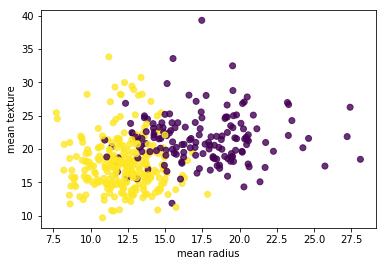

In [3]:
print('Gráfico exibindo as duas primeiras características do sub-conjunto de treino:')
_ = plt.scatter(x_train[:, 0], x_train[:, 1],
                c=y_train,
                alpha=0.8)
_ = plt.xlabel(dataset.feature_names[0])
_ = plt.ylabel(dataset.feature_names[1])

In [4]:
estimators = [SVC(random_state=13), LogisticRegression(random_state=24)]

for e in estimators:
    print('Treinando estimator', type(e).__name__)
    e.fit(x_train, y_train)

print('Todos os estimatores foram treinados!')

Treinando estimator SVC
Treinando estimator LogisticRegression
Todos os estimatores foram treinados!


### Qual dos dois estimadores apresenta menor taxa de erro sobre o conjunto WDBC teste?

In [5]:
from sklearn.metrics import accuracy_score, recall_score

for e in estimators:
    print('Teste do estimator', type(e).__name__)
    p_train = e.predict(x_test)
    
    print('exemplo de rótulos de treino verdadeiros:', y_train[:10], '...')
    print('exemplo de rótulos de treino preditos:', p_train[:10], '...')

    correct_ratings = accuracy_score(y_test, p_train, normalize=False)
    
    print('Classificações corretas =', correct_ratings) 
    print('Classificações erradas =', len(y_test) - correct_ratings)
    print('Acurácia =', accuracy_score(y_test, p_train))
    print('Acurácia normalizada =', recall_score(y_test, p_train, average='macro'))
    print('----------------------------------------------------------')

Teste do estimator SVC
exemplo de rótulos de treino verdadeiros: [1 0 1 0 0 0 1 0 1 1] ...
exemplo de rótulos de treino preditos: [1 1 1 1 1 1 1 1 1 1] ...
Classificações corretas = 89
Classificações erradas = 54
Acurácia = 0.6223776223776224
Acurácia normalizada = 0.5
----------------------------------------------------------
Teste do estimator LogisticRegression
exemplo de rótulos de treino verdadeiros: [1 0 1 0 0 0 1 0 1 1] ...
exemplo de rótulos de treino preditos: [1 0 0 1 1 0 0 0 1 1] ...
Classificações corretas = 138
Classificações erradas = 5
Acurácia = 0.965034965034965
Acurácia normalizada = 0.9609862671660424
----------------------------------------------------------


- Algum dos estimatores super-especificou sobre o conjunto de treinamento?  
    **Pela quantidade de acertos vs erros, aparentemente a Regressão Logística super-especificou (overfitting).**  
- Quantas vezes cada um dos estimadores errou, no conjunto de teste?  
    **Olhar para métrica Classificações erradas acima**


### Os estimadores conseguem distinguir ambas as classes de forma satisfatória?

Utilize uma ou mais funções vistas em aula para descobrir se os classificadores efetivamente conseguem distinguir amostras benignas de malignas.

Classes: ['malignant' 'benign']
----------------------------------------------------------
Estimador SVC
Matriz de confusão SVC (em quantidade de elementos)
[[ 0 54]
 [ 0 89]]
Matriz de confusão SVC (em %)
[[0. 1.]
 [0. 1.]]
----------------------------------------------------------
Estimador LogisticRegression
Matriz de confusão LogisticRegression (em quantidade de elementos)
[[51  3]
 [ 2 87]]
Matriz de confusão LogisticRegression (em %)
[[0.94 0.06]
 [0.02 0.98]]
----------------------------------------------------------


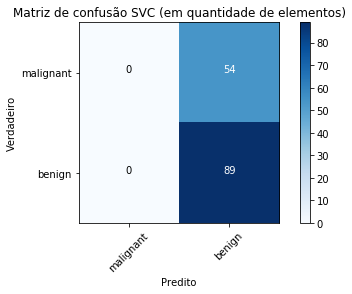

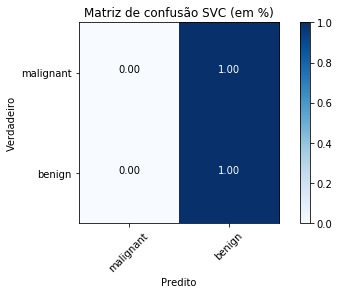

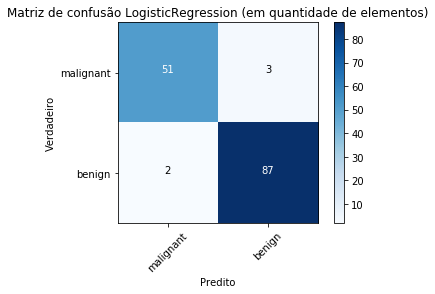

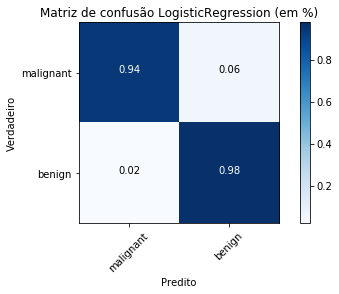

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

class_names = dataset.target_names

print('Classes:', class_names)
print('----------------------------------------------------------')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    print(title)
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')

for e in estimators:
    estimator_name = type(e).__name__
    print('Estimador', estimator_name)
    p_test = e.predict(x_test)
    # Calcula matriz de confusão
    cnf_matrix = confusion_matrix(y_test, p_test)
    np.set_printoptions(precision=2)
    title = f'Matriz de confusão {estimator_name} (em quantidade de elementos)'
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title=title)
    title = f'Matriz de confusão {estimator_name} (em %)'
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title=title, normalize=True)
    print('----------------------------------------------------------')

As pontuações mudam quando consideramos a frequência das classes?  
    **No caso da Regressão Logística, observamos que a regressão logística acertou mais para o lado dos benignos, que possuí uma maior frequência**  
    **No caso do SVC, o algoritmo acertou todos os benignos e errou todos os malígnos**

### Apresente um relatório das principais métricas para ambos estimadores

In [7]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

for e in estimators:
    print('Estimador', type(e).__name__)
    
    p_test = e.predict(x_test)
    print('Classificações corretas =', accuracy_score(y_test, p_test, normalize=False))
    print('Acurácia =', accuracy_score(y_test, p_test))
    print('Acurácia normalizada =', recall_score(y_test, p_test, average='macro'))
    
    fpr, tpr, thresholds = roc_curve(y_test, p_test)
    print('AUC = {:.2f}'.format(auc(fpr, tpr)))
    
    print('F1 = {:.2f}'.format(f1_score(y_test, p_test, average='binary')))
    
    print(classification_report(y_test, p_test, target_names=class_names))
    
    print('----------------------------------------------------------')

Estimador SVC
Classificações corretas = 89
Acurácia = 0.6223776223776224
Acurácia normalizada = 0.5
AUC = 0.50
F1 = 0.77
             precision    recall  f1-score   support

  malignant       0.00      0.00      0.00        54
     benign       0.62      1.00      0.77        89

avg / total       0.39      0.62      0.48       143

----------------------------------------------------------
Estimador LogisticRegression
Classificações corretas = 138
Acurácia = 0.965034965034965
Acurácia normalizada = 0.9609862671660424
AUC = 0.96
F1 = 0.97
             precision    recall  f1-score   support

  malignant       0.96      0.94      0.95        54
     benign       0.97      0.98      0.97        89

avg / total       0.97      0.97      0.96       143

----------------------------------------------------------


/home/anderson/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Qual estimador possui melhor *f-1 score*?  
    **LogisticRegression como mostrado acima**